In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('yield_df.csv')#if running locally change the path according to your machine

In [5]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()#removed unnamed column form df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [11]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [15]:
df.duplicated().sum()

2310

In [17]:
#we have 2310 duplicate rows in 28242 rows it is a small amount so drop these row
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(25932, 7)

In [21]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


<Axes: xlabel='count', ylabel='Area'>

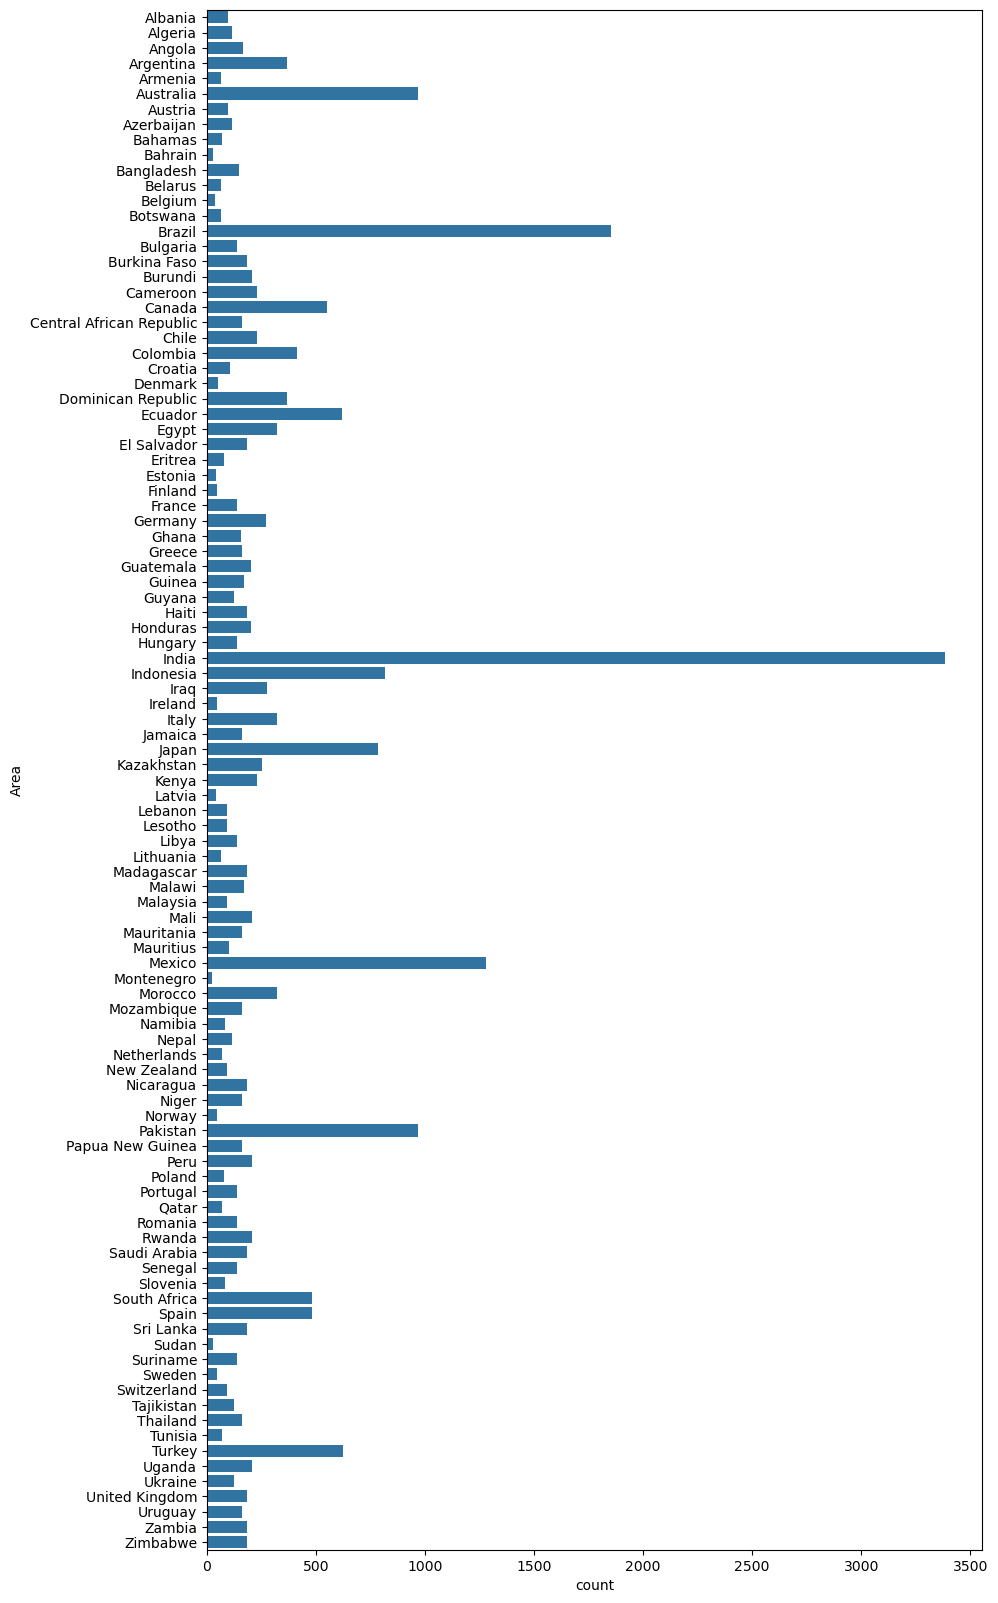

In [23]:
#how many entries with respect to each country 
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

<Axes: xlabel='hg/ha_yield'>

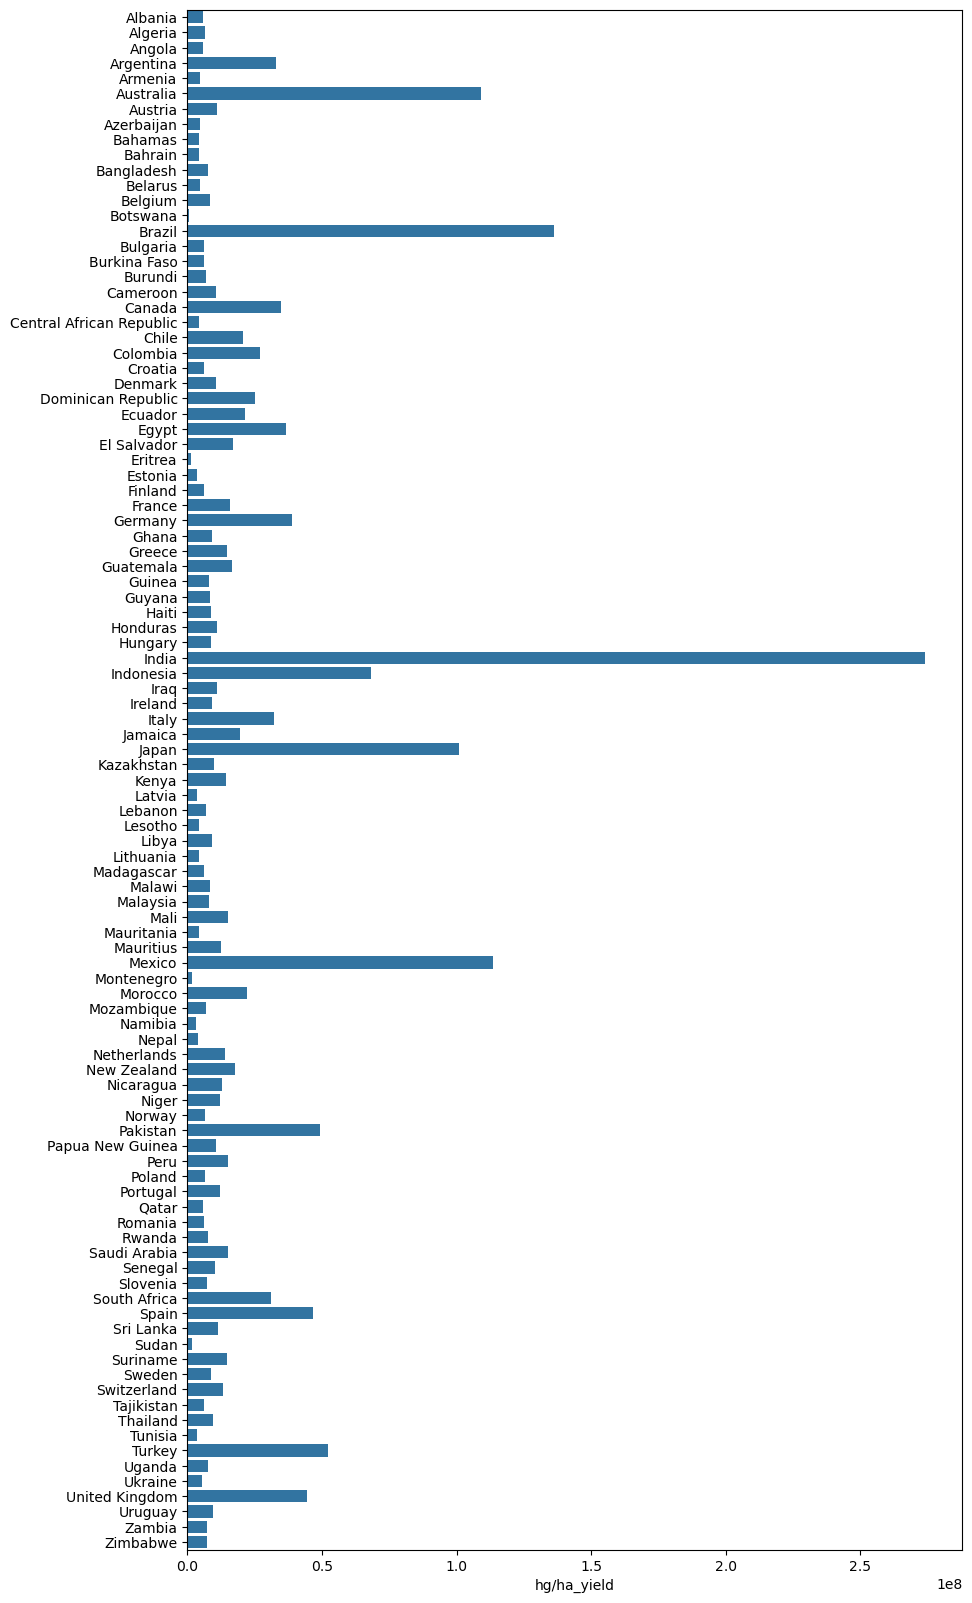

In [24]:
#yield of all crops per country?
t=df.groupby('Area')['hg/ha_yield'].sum()
plt.figure(figsize=(10,20))
sns.barplot(y=df['Area'].unique(),x=t)

<Axes: xlabel='count', ylabel='Item'>

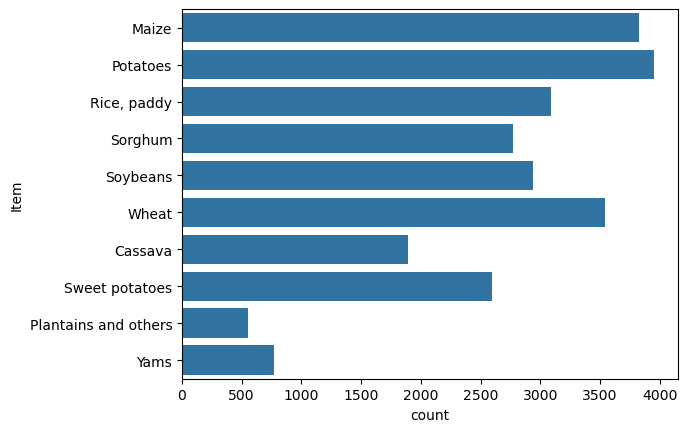

In [25]:
#frequency of each crop
sns.countplot(y=df['Item'])

<Axes: xlabel='hg/ha_yield'>

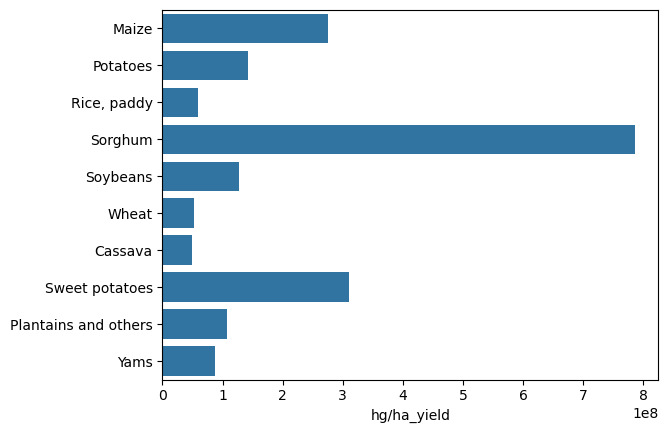

In [26]:
#yeild per crop ?
t=df.groupby('Item')['hg/ha_yield'].sum()
sns.barplot(y=df['Item'].unique(),x=t)

In [27]:
#hg/ha_yield is the output column so we will rearange the column order to make it last
cols=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[cols]

In [33]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [35]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train#area and item are categorical so we need to change them into numeric 

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


In [43]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [45]:
ohe=OneHotEncoder()
scaler=StandardScaler()
preprocessor=ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe,[4,5]),
        ('standarsScalar',scaler,[0,1,2,3])
    ],
    remainder='passthrough'
)
preprocessor  

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), [4, 5]),
                                ('standarsScalar', StandardScaler(),
                                 [0, 1, 2, 3])])

In [47]:
X_train_final=preprocessor.fit_transform(X_train)
X_test_final=preprocessor.transform(X_test)

In [49]:
X_train_final

<20745x115 sparse matrix of type '<class 'numpy.float64'>'
	with 124470 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
models={
    'lr':LinearRegression(),
    'ls':Lasso(),
    'rd':Ridge(),
    'kn':KNeighborsRegressor(),
    'dt':DecisionTreeRegressor()
}
for names,mod in models.items():
    mod.fit(X_train_final,y_train)
    y_pred=mod.predict(X_test_final)
    print(f'{names} MSE={mean_squared_error(y_test,y_pred)} ,r2_score={r2_score(y_test,y_pred)}')

lr MSE=1821706642.8229773 ,r2_score=0.7486570048621368


C:\Users\YOGA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28389699368.414062, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


ls MSE=1822127464.7722905 ,r2_score=0.748598943565837
rd MSE=1822594694.3198395 ,r2_score=0.7485344793589568
kn MSE=117396514.9674571 ,r2_score=0.9838026655900299
dt MSE=171061526.87757856 ,r2_score=0.9763984411608446


In [55]:
#out of all model KNeighborsRegressor has the best test result
model=KNeighborsRegressor()
model.fit(X_train_final,y_train)

KNeighborsRegressor()

In [65]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features=np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])
    tr_features=preprocessor.transform(features)
    prediction=model.predict(tr_features)
    return prediction

In [73]:
#pickling the model and preprocessor so that it can be used by the website
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [1]:
import sklearn
print(sklearn.__version__)

1.5.2
